In [24]:
import pandas as pd
#reading the excel file
data = pd.read_csv(r"C:\Users\user\Desktop\IOT Homework\datas.csv")
data.head()

,feat_1,feat_2,target
0,20.082485,705.582579,0
1,19.800203,565.669065,0
2,19.775263,656.251987,0
3,20.074448,713.412927,0
4,19.998628,620.737595,0


In [25]:
#Splitting the excel file as Feature and Target
X = data.drop('target',axis=1)
Y = data['target']

In [26]:
from scipy import stats 
#Normalizing the features with Z-Score normalization
scaled_train_set = stats.zscore(X, axis=0, ddof=0)

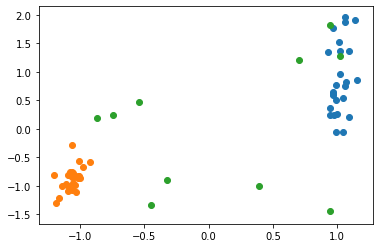

In [27]:
import matplotlib
import matplotlib.pyplot as plt

#plotting the normalized training set as non-categorised ( yet )
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(scaled_train_set[:25,0], scaled_train_set[:25,1])
ax.scatter(scaled_train_set[25:50,0], scaled_train_set[25:50,1])
ax.scatter(scaled_train_set[50:,0], scaled_train_set[50:,1])
plt.show()

In [28]:
#Normalize edilmemiş halini görmek için lütfen bu kod bloğunu değiştiriniz

#Splitting the normalized features and Targets as train (50 features) and test (10 features)
#First 50 features are the train last 10 are the test datas.
train_pct_index = int(0.84 * len(X))
X_train, X_test = scaled_train_set[:train_pct_index], scaled_train_set[train_pct_index:]
y_train, y_test = Y[:train_pct_index], Y[train_pct_index:]

In [29]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
predict = knn.fit(X_train,y_train)

In [30]:
#show predictions on the test data
y_pred = knn.predict(X_test)[:]
y_pred

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

In [31]:
#check accuracy of our model on the test data
accuracy = knn.score(X_test, y_test)
accuracy

1.0

In [32]:
from sklearn.metrics import confusion_matrix, classification_report
#Confusion matrix
confusion_matrix(y_test, y_pred.round())


array([[5, 0],
       [0, 5]], dtype=int64)

In [33]:
#classifaction report (detailed)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



Automatically created module for IPython interactive environment


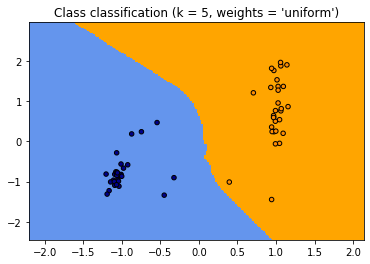

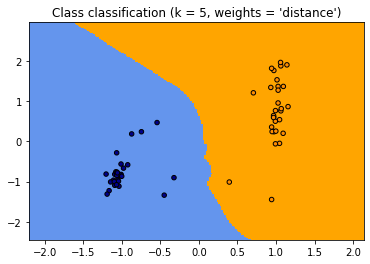

In [34]:
print(__doc__)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors

#number of neigbors that should calculated
n_neighbors = 5

#inputs for the map
X = scaled_train_set
y = data['target']

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()